In [102]:
!pip install --upgrade gspread gspread_dataframe oauth2client

In [107]:
# realizar todos los imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth # Autenticación con mi cuenta de Google
import gspread # Crear conexión con Google Sheets
from google.auth import default
from gspread_dataframe import get_as_dataframe # Leer el contenido como un DataFrame de pandas

In [108]:
# Autenticación con mi cuenta de Google
auth.authenticate_user()

In [109]:
# Crear conexión con Google Sheets
creds, _ = default()
gc = gspread.authorize(creds)

In [110]:
# Abrir archivo de Google Sheets
sheet_id = "1mfMv_EjvrAs0bPkz9ZxZ-0qKmxcONtDLNq2zR0lBqUA"
worksheet = gc.open_by_key(sheet_id).sheet1

In [111]:
# Leer todo sin encabezado (para que no se mezclen)
df_raw = get_as_dataframe(worksheet, header=None, evaluate_formulas=True)

# Verificar visualmente las primeras filas
df_raw.head(3)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Playing Time,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,90_min_Ast,90_min_G+A,90_min_G-PK,90_min_G+A-PK,90_min_xG,90_min_xAG,90_min_xG+xAG,90_min_npxG,90_min_npxG+xAG,Matche
2,1,Saminu Abdullahi,ng NGA,MF,FC Juárez,23,2001,3,0,48,...,1.87,1.87,0.00,1.87,0.00,0.18,0.18,0.00,0.18,Matches


In [112]:
# Usar la fila 2 como encabezado
df_raw.columns = df_raw.iloc[1]

# Eliminar la primera y segunda fila (índices 0 y 1)
df_clean = df_raw[2:].reset_index(drop=True)

# Visualizamos el resultado
df_clean.head()

1,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,90_min_Ast,90_min_G+A,90_min_G-PK,90_min_G+A-PK,90_min_xG,90_min_xAG,90_min_xG+xAG,90_min_npxG,90_min_npxG+xAG,Matche
0,1,Saminu Abdullahi,ng NGA,MF,FC Juárez,23,2001,3,0,48,...,1.87,1.87,0.00,1.87,0.00,0.18,0.18,0.00,0.18,Matches
1,2,José Abella,mx MEX,DF,Santos,30,1994,17,17,1.51,...,0.12,0.12,0.00,0.12,0.01,0.10,0.11,0.01,0.11,Matches
2,3,José Abella,mx MEX,DF,FC Juárez,30,1994,17,11,1.014,...,0.09,0.09,0.00,0.09,0.02,0.03,0.05,0.02,0.05,Matches
3,4,Diego Abitia,mx MEX,FW,Atlético,21,2003,11,3,320,...,0.00,0.00,0.00,0.00,0.11,0.12,0.23,0.11,0.23,Matches
4,5,Carlos Acevedo,mx MEX,GK,Santos,28,1996,33,33,2.97,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches


In [113]:
# Eliminar la última columna (Matches)
df_clean = df_clean.iloc[:, :-1]
df_clean.head()

1,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,90_min_Gls,90_min_Ast,90_min_G+A,90_min_G-PK,90_min_G+A-PK,90_min_xG,90_min_xAG,90_min_xG+xAG,90_min_npxG,90_min_npxG+xAG
0,1,Saminu Abdullahi,ng NGA,MF,FC Juárez,23,2001,3,0,48,...,0.00,1.87,1.87,0.00,1.87,0.00,0.18,0.18,0.00,0.18
1,2,José Abella,mx MEX,DF,Santos,30,1994,17,17,1.51,...,0.00,0.12,0.12,0.00,0.12,0.01,0.10,0.11,0.01,0.11
2,3,José Abella,mx MEX,DF,FC Juárez,30,1994,17,11,1.014,...,0.00,0.09,0.09,0.00,0.09,0.02,0.03,0.05,0.02,0.05
3,4,Diego Abitia,mx MEX,FW,Atlético,21,2003,11,3,320,...,0.00,0.00,0.00,0.00,0.00,0.11,0.12,0.23,0.11,0.23
4,5,Carlos Acevedo,mx MEX,GK,Santos,28,1996,33,33,2.97,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [114]:
# Obtener los nombres de las columnas
df_clean.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Perf_Gls', 'Perf_Ast', 'Perf_G+A', 'Perf_G-PK',
       'Perf_PK', 'Perf_PKatt', 'Perf_CrdY', 'Perf_CrdR', 'Exp_xG', 'Exp_npxG',
       'Exp_xAG', 'Exp_npxG+xAG', 'PrgC', 'PrgP', 'PrgR', '90_min_Gls',
       '90_min_Ast', '90_min_G+A', '90_min_G-PK', '90_min_G+A-PK', '90_min_xG',
       '90_min_xAG', '90_min_xG+xAG', '90_min_npxG', '90_min_npxG+xAG'],
      dtype='object', name=1)

In [121]:
# Limpieza y transformación de columnas
# Convertir la columna 'Min' a numérica, manejando comas y errores
df_clean['Min'] = df_clean['Min'].astype(str).str.replace(',', '').astype(float)

# Asegurarse de que 'Age' también es numérica
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')

# Verificar que no haya valores nulos en Score al final
print("¿Hay valores nulos en 'Min'? ", df_clean['Min'].isnull().any())
print("¿Hay valores nulos en 'Age'? ", df_clean['Age'].isnull().any())

¿Hay valores nulos en 'Min'?  False
¿Hay valores nulos en 'Age'?  False


In [123]:
# Cálculo del Score (rendimiento ponderado)
# Variables de rendimiento por 90 minutos que consideramos para el Score
cols_score = [
    '90_min_G+A', '90_min_xG', '90_min_xAG', '90_min_xG+xAG',
    '90_min_npxG', '90_min_npxG+xAG'
]

# Convertir esas columnas a numérico por seguridad
df_clean[cols_score] = df_clean[cols_score].apply(pd.to_numeric, errors='coerce')

# Calcular el Score como suma ponderada multiplicada por los minutos jugados
df_clean['Score'] = df_clean[cols_score].sum(axis=1) * df_clean['Min']

# Verificación de nulos en Score
print("¿Hay valores nulos en 'Score'? ", df_clean['Score'].isnull().any())


¿Hay valores nulos en 'Score'?  False


In [132]:
# Filtrado de jugadores jóvenes y activos
# Filtrar jugadores con más de 200 minutos
df_filtrado = df_clean[df_clean['Min'] >= 200]

# Jugadores mexicanos jóvenes (máximo 25 años y nacionalidad mexicana)
jugadores_jovenes = df_filtrado[
    (df_filtrado['Age'] <= 25) & (df_filtrado['Nation'] == 'mx MEX')
]

In [133]:
# Promedio de Score por equipo y posición
promedios = df_filtrado.groupby(['Squad', 'Pos'])['Score'].mean().reset_index()
promedios.columns = ['Equipo', 'Posicion', 'Promedio_Score']

In [237]:
# Función para obtener los 5 mejores prospectos por equipo
def obtener_prospectos_por_equipo(equipo, df_base, promedios, edad_max=25):
    """
    Retorna hasta 5 prospectos por posición para el equipo dado,
    considerando solo jugadores jóvenes y filtrando por mexicanos si es Guadalajara.
    """
    # Jugadores jóvenes externos al equipo
    df_externos = df_base[
        (df_base['Squad'] != equipo) &
        (df_base['Age'] <= edad_max)
    ].copy()

    # Si el equipo es Guadalajara, filtrar también por nacionalidad mexicana
    if equipo == "Guadalajara":
        df_externos = df_externos[df_externos['Nation'].str.contains("MEX", case=False)]

    prospectos_equipo = pd.DataFrame()

    # Identificar las posiciones que tiene el equipo
    posiciones_equipo = df_base[df_base['Squad'] == equipo]['Pos'].dropna().unique()

    for pos in posiciones_equipo:
        # Obtener el promedio de Score para esa posición en ese equipo
        promedio_equipo_pos = promedios[
            (promedios['Equipo'] == equipo) & (promedios['Posicion'] == pos)
        ]['Promedio_Score'].values

        if len(promedio_equipo_pos) == 0:
            continue

        promedio = promedio_equipo_pos[0]

        # Filtrar candidatos externos que jueguen esa posición y superen el promedio
        candidatos = df_externos[
            (df_externos['Pos'] == pos) &
            (df_externos['Score'] > promedio)
        ].copy()

        # Seleccionar los 5 mejores prospectos para esa posición
        top_candidatos = candidatos.sort_values(by='Score', ascending=False).head(5)
        top_candidatos['Equipo_destino'] = equipo

        prospectos_equipo = pd.concat([prospectos_equipo, top_candidatos], ignore_index=True)

    return prospectos_equipo

In [239]:
prospectos_guadalajara = obtener_prospectos_por_equipo('Guadalajara', df_filtrado, promedios, edad_max=25)
print(prospectos_guadalajara[['Player', 'Nation', 'Squad', 'Age', 'Score']])

1               Player  Nation      Squad  Age    Score
0          Jesús Rivas  mx MEX     Puebla   21   393.76
1       Jonathan Pérez  mx MEX     Santos   18   364.08
2       Miguel Vázquez  mx MEX    América   20   317.52
3     Alfonso Alvarado  mx MEX       León   24  1440.20
4   Roberto de la Rosa  mx MEX  Monterrey   24  1435.84
5       Amaury Morales  mx MEX  Cruz Azul   18  1114.96
6       Tahiel Jiménez  mx MEX     Santos   18  1004.64
7        Alán Bautista  mx MEX    Pachuca   21   948.70
8           Ángel Rico  mx MEX       UNAM   19   806.52
9      Santiago Trigos  mx MEX       UNAM   22   649.40
10       Aldahir Perez  mx MEX  Querétaro   19   561.60
11     Santiago Naveda  mx MEX     Santos   23   483.99


In [240]:
# Aplicar la función a todos los equipos
prospectos_total = pd.DataFrame()

for equipo in equipos:
    resultado = obtener_prospectos_por_equipo(equipo, df_filtrado, promedios, edad_max=25)
    prospectos_total = pd.concat([prospectos_total, resultado], ignore_index=True)

# Mostrar primeros resultados
prospectos_total[['Equipo_destino', 'Player', 'Score', 'Squad', 'Age', 'Nation']].head(10)

1,Equipo_destino,Player,Score,Squad,Age,Nation
0,Atlético,Tomás Badaloni,2222.70,Necaxa,24,ar ARG
1,Atlético,Armando González,1869.83,Guadalajara,21,mx MEX
2,Atlético,Robert Morales,1805.76,Toluca,25,py PAR
3,Atlético,Bruno Barticciotto,1779.54,Santos,23,cl CHI
4,Atlético,Jonathan Padilla,1723.04,Guadalajara,18,mx MEX
5,Atlético,Mateusz Bogusz,1573.96,Cruz Azul,22,pl POL
6,Atlético,Franco Fagúndez,1476.00,Santos,24,uy URU
7,Atlético,Diego Hernández,1321.83,León,24,uy URU
8,Atlético,Diego González,1221.34,Atlas,21,py PAR
9,Atlético,Arturo Palma,703.57,Necaxa,22,mx MEX


In [241]:
prospectos_total[prospectos_total['Equipo_destino'] == 'Guadalajara']['Nation'].value_counts()

,count
Nation,
mx MEX,12


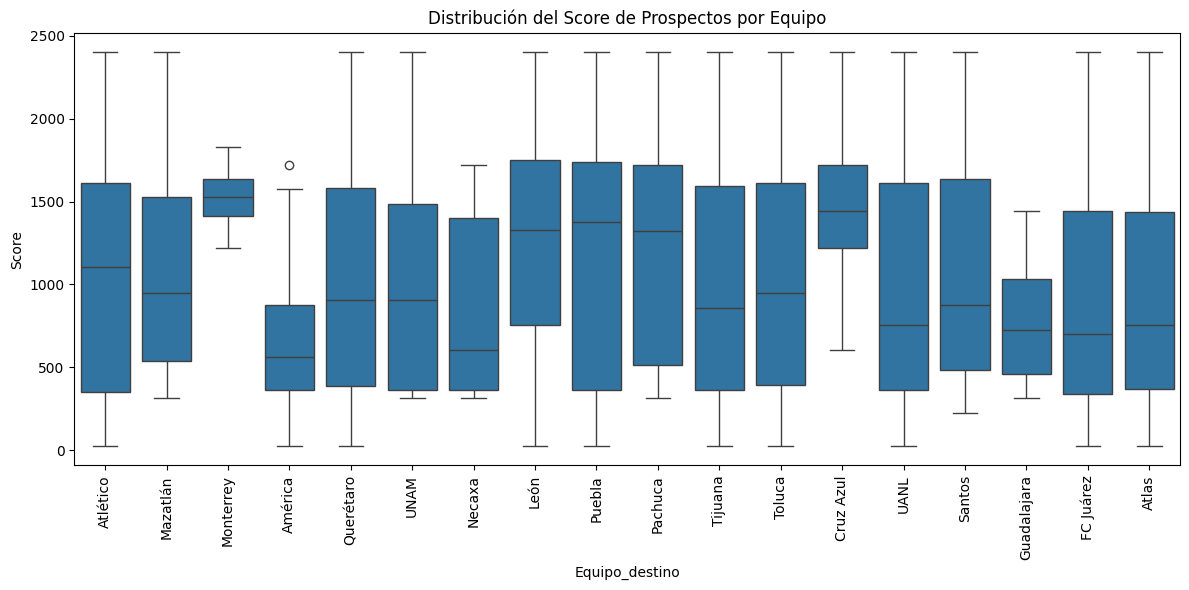

In [242]:
# Gráficas explicativas
# Gráfica 1: Score por equipo destino
plt.figure(figsize=(12, 6))
sns.boxplot(data=prospectos_total, x='Equipo_destino', y='Score')
plt.xticks(rotation=90)
plt.title('Distribución del Score de Prospectos por Equipo')
plt.tight_layout()
plt.show()

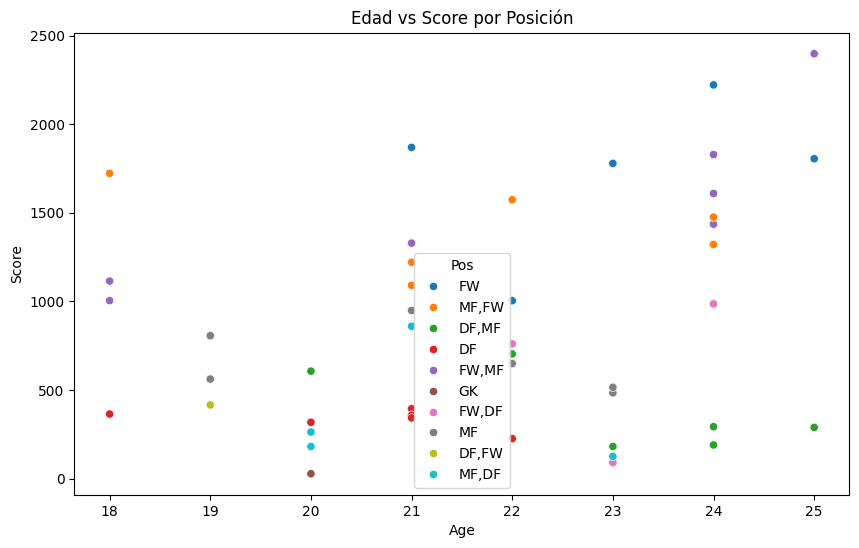

In [243]:
# Gráfica 2: Edad vs Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=prospectos_total, x='Age', y='Score', hue='Pos')
plt.title('Edad vs Score por Posición')
plt.show()

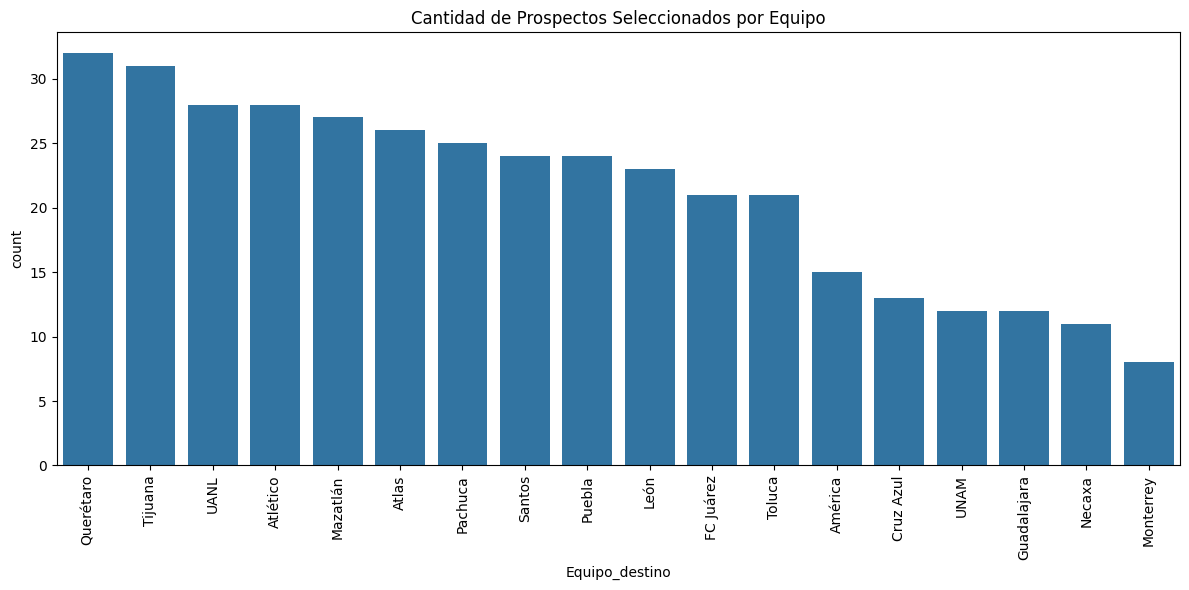

In [244]:
# Gráfica 3: Conteo de prospectos por equipo
plt.figure(figsize=(12, 6))
sns.countplot(data=prospectos_total, x='Equipo_destino', order=prospectos_total['Equipo_destino'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cantidad de Prospectos Seleccionados por Equipo')
plt.tight_layout()
plt.show()

In [246]:
# Verifica manualmente si quedan extranjeros
extranjeros_guadalajara = prospectos_total[
    (prospectos_total['Equipo_destino'] == 'Guadalajara') &
    (~prospectos_total['Nation'].str.contains("MEX", case=False, na=False))
]

print(extranjeros_guadalajara[['Player', 'Nation', 'Squad']])

Empty DataFrame
Columns: [Player, Nation, Squad]
Index: []


In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [247]:
# Filtro final antes de guardar
prospectos_total_limpio = prospectos_total[
    ~((prospectos_total['Equipo_destino'] == 'Guadalajara') &
      (~prospectos_total['Nation'].str.contains("MEX", case=False, na=False)))
]

# Guardar en Drive
prospectos_total_limpio.to_csv('/content/drive/MyDrive/Análisis Liga MX/prospectos_final.csv', index=False)